# Genetic Algorithm TSP

In [1]:
from random import randint
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. Initialization

In [2]:
#holds the x coord, y coord, and a key for sorting
class cities:
    def __init__(self, x,y, key):
        self.x = x
        self.y = y
        self.key = key

In [3]:
#randomly generates n cities with x and y coords
def makeCities(num):
    cityList = {}
    for i in range(0,num):
        cityList[i] = cities(randint(0,200),randint(0,200),i)
    return cityList

## 2. Evaluation

In [4]:
#distance calc
def distance(city1, city2):
    distancex = np.sqrt((city1.x-city2.x)**2)
    distancey = np.sqrt((city1.y-city2.y)**2)
    return np.sqrt(distancex**2 + distancey**2)

In [5]:
def fitness(key,cityList):
    #assigns a fitness value based on the inverse of the distance between cities
    fitness = {}
    for i in range(0,len(key)):
        if((i+1) < len(key)):
            fitness[i] = 1/(distance(cityList[key[i]],cityList[key[i+1]]))
    return fitness

## 3. Selection

In [6]:
def tournament(route1,route2,keys1,keys2):
    #randomly takes k elements and assesses which ones are closest to eachother
    sub1 = random.choices(keys1,k=4)
    sub2 = random.choices(keys2,k=4)
    #gives the elements that were chosen at random with the corresponding fitness scores
    f1 = fitness(sub1,route1)
    f2 = fitness(sub2,route2)
    #sorts fitness arrays to be in order
    for i in range(0,len(f1)):
        for x in range(i,len(f2)):
            if(f1[i] > f1[x]):
                temp = f1[x]
                f1[x] = f1[i]
                f1[i] = temp
                temp = sub1[i]
                sub1[i] = sub1[x]
                sub1[x] = temp
            if(f2[i] > f2[x]):
                temp = f2[x]
                f2[x] = f2[i]
                f2[i] = temp
                temp = sub2[i]
                sub2[i] = sub2[x]
                sub2[x] = temp
    for i in range(0,len(route1)):
        #it only replaces half of the key values (only the best ones)
        for x in range(0,int(len(f1)/2)):
        #if one of the elements with a good fitness value are found it will swap out the elements to create a new child 
            if(f1[x] == route1[i]):
                elem = route1.index(f1[x+1])
                temp = route1[elem]
                route1[elem] = route1[i+1]
                route1[i+1] = temp
            if(f2[x] == route2[i]):
                elem = route2.index(f2[x+1])
                temp = route2[elem]
                route2[elem] = route2[i+1]
                route2[i+1] = temp
    return route1,route2

## 4. Crossover and Mutation

In [7]:
#randomly arranges the keys into new lists (parents)
#then re sorts the city list to match the random key lists
def findRoute(cityList):
    keys = {}
    for i in range(0,len(cityList)):
        keys[i] = cityList[i].key
    np.random.shuffle(keys)
    ret = {}
    for i in range(0,len(cityList)):
        ret[i] = cityList[keys[i]]
    return keys, ret

In [8]:
def tourn(cityList):
    #generates the parent routes
    keys1,route1 = findRoute(cityList)
    keys2,route2 = findRoute(cityList)
    return tournament(route1,route2,keys1,keys2)

# Problem 1

In [9]:
#makes the cities and creates the next generation
ll = makeCities(10)
child1, child2 = tourn(ll)

#prints out the child routes and the original
print("Child1")
child1_list = [child1[i].key for i in range(len(child1))]
print(child1_list)

print("child2")
child2_list = [child2[i].key for i in range(len(child2))]
print(child2_list)

print("origional")
original = [ll[i].key for i in range(len(ll))]
print(original)

Child1
[3, 0, 7, 5, 2, 9, 4, 6, 8, 1]
child2
[2, 4, 6, 9, 1, 0, 8, 3, 7, 5]
origional
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


[133, 110, 69, 187, 116, 171, 104, 103, 197, 79, 133]
[79, 110, 186, 158, 35, 104, 198, 100, 105, 134, 79]


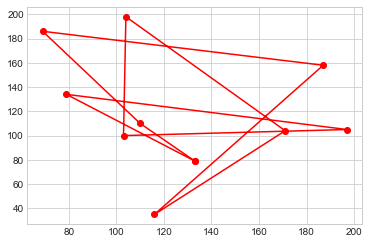

In [10]:
x, y = [], []
for key in child2_list:
    x.append(child2[key].x)
    y.append(child2[key].y)
x.append(x[0])
y.append(y[0])
print(x)
print(y)

plt.plot(x, y, '-ok', color='red')

# Problem 2